In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats

In [7]:
# Human
file_in_ls = 'ls_w2_hg'
path_in_bw_cf = '/media/vetbio/KH_4TB/ChIP_processed/Encode_results_220628/02_Signal/bw_pval'
path_in_bw_com = '/media/vetbio/Extend_03/210301_Main_Ref_Epi/01_Public/public_ChIP_220614/Human'
path_in_bed_cf = '02_ortho_bed_w2species/cf3_hg38'
path_in_bed_com = '01_merge_bed/hg38'

path_out = '03_bw_signal_w2_cf_hg'

In [8]:
ls_process = ['k4me3_pro', 'k4me1_pro', 'k27ac_pro', 'k4me1_enh', 'k27ac_enh', 'k4me3_het', 'k4me1_het', 'k27ac_het', 'k27me3_het', 'k9me3_het']
ls_tissue = ['CL', 'CR', 'CO', 'KI', 'LI', 'LU', 'MG', 'OV', 'PA', 'SP' ,'ST']
ls_region = ['pro', 'enh', 'het']
ls_mark = ['k4me3', 'k4me1', 'k27ac', 'k27me3', 'k9me3']

#pd_hm_pearson = pd.DataFrame(index=ls_tissue, columns=ls_process)
pd_hm_spearman = pd.DataFrame(index=ls_tissue, columns=ls_process)

In [4]:
"""
# Calculate bw signal
with open(file_in_ls, 'r') as ls_tissue_mark:
    for line in ls_tissue_mark:
        tissue = line.strip().split('\t')[0]
        mark = line.strip().split('\t')[1]
        for region in ls_region:
            if f'{mark}_{region}' in ls_process:
                print(f'## {tissue}, {mark}, {region}')
                
                ## set name of input and output
                in_bw_cf = f'{path_in_bw_cf}/ChIP_{tissue}_{mark}_pval.signal.bigwig'
                in_bw_com = f'{path_in_bw_com}/{tissue}_{mark}_hg38.mg.bw'
                in_bed_cf = f'{path_in_bed_cf}/{tissue}_cf3_{region}_ortho_hg38.bed'
                in_bed_com = f'{path_in_bed_com}/{tissue}_hg38_{region}.bed'
                out_cf_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_cf.txt'
                out_com_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_hg.txt'
                
                ## Run command
                cmd_cf = f'./bigWigAverageOverBed {in_bw_cf} {in_bed_cf} {out_cf_txt}'
                cmd_com = f'./bigWigAverageOverBed {in_bw_com} {in_bed_com} {out_com_txt}'
                print(cmd_cf)
                os.system(cmd_cf)
                print(cmd_com)
                os.system(cmd_com)
"""

## CL, k4me3, het
./bigWigAverageOverBed /media/vetbio/KH_4TB/ChIP_processed/Encode_results_220628/02_Signal/bw_pval/ChIP_CL_k4me3_pval.signal.bigwig 02_ortho_bed_w2species/cf3_hg38/CL_cf3_het_ortho_hg38.bed 03_bw_signal_w2_cf_hg/bw_pval_CL_het_k4me3_w2_cf.txt
./bigWigAverageOverBed /media/vetbio/Extend_03/210301_Main_Ref_Epi/01_Public/public_ChIP_220614/Human/CL_k4me3_hg38.mg.bw 01_merge_bed/hg38/CL_hg38_het.bed 03_bw_signal_w2_cf_hg/bw_pval_CL_het_k4me3_w2_hg.txt
## CR, k27ac, het
./bigWigAverageOverBed /media/vetbio/KH_4TB/ChIP_processed/Encode_results_220628/02_Signal/bw_pval/ChIP_CR_k27ac_pval.signal.bigwig 02_ortho_bed_w2species/cf3_hg38/CR_cf3_het_ortho_hg38.bed 03_bw_signal_w2_cf_hg/bw_pval_CR_het_k27ac_w2_cf.txt
./bigWigAverageOverBed /media/vetbio/Extend_03/210301_Main_Ref_Epi/01_Public/public_ChIP_220614/Human/CR_k27ac_hg38.mg.bw 01_merge_bed/hg38/CR_hg38_het.bed 03_bw_signal_w2_cf_hg/bw_pval_CR_het_k27ac_w2_hg.txt
## CR, k27me3, het
./bigWigAverageOverBed /media/vetbio/KH_4

In [10]:
# Calculate corr. & pval and merge results
with open(file_in_ls, 'r') as ls_tissue_mark:
    for line in ls_tissue_mark:
        tissue = line.strip().split('\t')[0]
        mark = line.strip().split('\t')[1]
        for region in ls_region:
            if f'{mark}_{region}' in ls_process:
                print(f'## {tissue}, {mark}, {region}')
                
                ## set name of input and output
                in_cf_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_cf.txt'
                in_com_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_hg.txt'
                

                pd_bw_cf = pd.read_csv(in_cf_txt, sep='\t', header=None, index_col=0)[4]
                pd_bw_com = pd.read_csv(in_com_txt, sep='\t', header=None, index_col=0)[4]
                pd_mg = pd.concat([pd_bw_cf, pd_bw_com], axis=1)
                pd_mg.columns = ['cf', 'com']               
                
                
                ls_p = scipy.stats.pearsonr(pd_mg['cf'], pd_mg['com'])
                ls_s = scipy.stats.spearmanr(pd_mg['cf'], pd_mg['com'])
                    
                #pd_hm_pearson.loc[tissue, f'{mark}_{region}'] = round(ls_p[0], 6)
                pd_hm_spearman.loc[tissue, f'{mark}_{region}'] = round(ls_s[0], 6)

## CL, k4me3, pro
## CL, k4me3, het
## CR, k27ac, pro
## CR, k27ac, enh
## CR, k27ac, het
## CR, k27me3, het
## CR, k4me1, pro
## CR, k4me1, enh
## CR, k4me1, het
## CR, k4me3, pro
## CR, k4me3, het
## CR, k9me3, het
## CO, k27ac, pro
## CO, k27ac, enh
## CO, k27ac, het
## CO, k27me3, het
## CO, k4me1, pro
## CO, k4me1, enh
## CO, k4me1, het
## CO, k4me3, pro
## CO, k4me3, het
## CO, k9me3, het
## KI, k27ac, pro
## KI, k27ac, enh
## KI, k27ac, het
## KI, k4me1, pro
## KI, k4me1, enh
## KI, k4me1, het
## KI, k4me3, pro
## KI, k4me3, het
## KI, k9me3, het
## LI, k27ac, pro
## LI, k27ac, enh
## LI, k27ac, het
## LI, k27me3, het
## LI, k4me1, pro
## LI, k4me1, enh
## LI, k4me1, het
## LI, k4me3, pro
## LI, k4me3, het
## LI, k9me3, het
## LU, k27ac, pro
## LU, k27ac, enh
## LU, k27ac, het
## LU, k27me3, het
## LU, k4me1, pro
## LU, k4me1, enh
## LU, k4me1, het
## LU, k4me3, pro
## LU, k4me3, het
## LU, k9me3, het
## MG, k27ac, pro
## MG, k27ac, enh
## MG, k27ac, het
## MG, k27me3, het
## MG

In [12]:
#pd_hm_pearson_rmNA = pd_hm_pearson.fillna(-1)
#pd_hm_pearson_rmNA_rm0 = pd_hm_pearson_rmNA[pd_hm_pearson_rmNA.sum(axis=1) != -7]

pd_hm_spearman_rmNA = pd_hm_spearman.fillna(0)
pd_hm_spearman_rmNA_rm0 = pd_hm_spearman_rmNA[pd_hm_spearman_rmNA.sum(axis=1) != 0]

In [38]:
pd_hm_spearman_rmNA_rm0.to_csv('HM_w2_hg_spearman_rmNA_rm0.txt', sep='\t')

In [13]:
pd_hm_spearman_rmNA_rm0.max().max()

0.725075

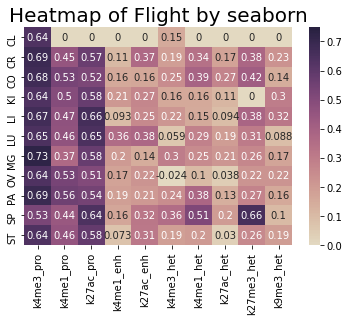

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_spearman_rmNA_rm0, 
                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
                 vmin=0, vmax=0.748173,
                 annot=True)

#ax = sns.heatmap(pd_hm_spearman_rmNA_rm0.drop(index = 'SP'), 
#                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
#                 vmin=0, vmax=0.748173,
#                 annot=True)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.savefig('HM_w2_hg_spearman_rmNA_rm0.pdf')

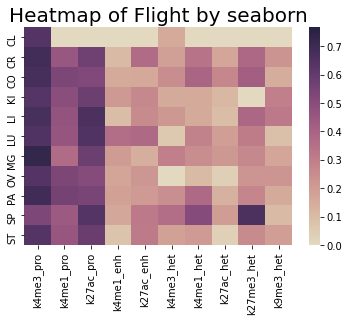

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_spearman_rmNA_rm0, 
                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
                 vmin=0, vmax=0.766076)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.savefig('HM_w2_hg_spearman_rmNA_rm0_noAnn.pdf')